In [32]:
import pandas as pd
df = pd.read_csv('/kaggle/input/heart-disease-classification/heart.csv')
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import seaborn as sns

In [3]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Escolher a variável dependente
#Age
modelo1 = smf.ols('age ~ cholestoral + resting_bp', data = df).fit()

In [6]:
residuos = modelo1.resid
residuos

0       7.277025
1     -17.269459
2     -11.802217
3       3.507598
4       0.743803
         ...    
298     1.687105
299    -7.055001
300    13.685938
301     6.526232
302     3.177093
Length: 303, dtype: float64

In [8]:
import scipy.stats as stats

In [9]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

#Ho = distribuição normal : p > 0.05
#Ha = distribuição != normal : p <= 0.05

Estatística de teste: 0.9946668744087219
p-valor: 0.3742524981498718


p-valor > 0.05, logo temos uma distribuição normal

In [10]:
import matplotlib.pyplot as plt

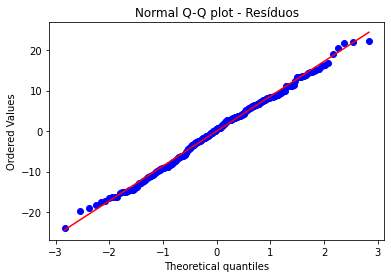

In [11]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

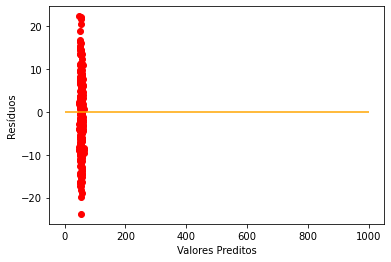

In [12]:
#Análise da Homoscedasticidade


plt.scatter(y=residuos, x=modelo1.predict(), color='red')
plt.hlines(y=0, xmin=0.1, xmax=1000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

In [13]:
#Realizando Teste de Breusch-Pagan 
#Ho = existe homocedasticidade : p > 0.05
#Ha = não existe homocedasticidade : p <= 0.05
from statsmodels.compat import lzip
estatistica, p, f, fp = sms.het_breuschpagan (modelo1.resid, modelo1.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 5.5864216392144055
p-valor: 0.06122431774526098
f-valor: 2.817501643672928
f_p-valor: 0.06133728734874729


Existe Homocedasticidade pois p-valor 0.061

In [16]:
#Existe Outlier (tem que estar entre 3 e - 3)
outliers = modelo1.outlier_test()
outliers.max()


student_resid    2.649918
unadj_p          0.999496
bonf(p)          1.000000
dtype: float64

In [17]:
outliers.min()

student_resid   -2.809226
unadj_p          0.005293
bonf(p)          1.000000
dtype: float64

Esta entre 3 e -3

In [20]:
import statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning

In [21]:
estatistica = statsmodels.stats.stattools.durbin_watson(modelo1.resid)
print('Estatística de teste: {}'.format(estatistica))

Estatística de teste: 2.0058256706113022


In [22]:
#Teste de multicoliearidade
variaveis = df[['cholestoral', 'resting_bp']]
variaveis.head()

,cholestoral,resting_bp
0,233,145
1,250,130
2,204,130
3,236,120
4,354,120


In [23]:
correlacoes = variaveis.corr(method='pearson')
correlacoes

,cholestoral,resting_bp
cholestoral,1.000000,0.123174
resting_bp,0.123174,1.000000


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [25]:
#Usando Fator de Inflação de Variância (VIF)
vif = add_constant(variaveis) # função espera a presença de uma constante na matriz de variáveis ​​explicativas
pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns)

const          72.431467
cholestoral     1.015406
resting_bp      1.015406
dtype: float64

In [26]:
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     18.67
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           2.29e-08
Time:                        01:02:36   Log-Likelihood:                -1080.2
No. Observations:                 303   AIC:                             2166.
Df Residuals:                     300   BIC:                             2177.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      28.9988      4.201      6.902      

In [36]:
# Criando uma coluna com previsão
df['previsao'] = modelo1.fittedvalues

In [37]:
df.head(20)

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target,previsao
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,55.722975
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,54.269459
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,52.802217
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,52.492402
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,56.256197
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,53.749963
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,57.003413
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,53.353609
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,58.230855
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,54.314951


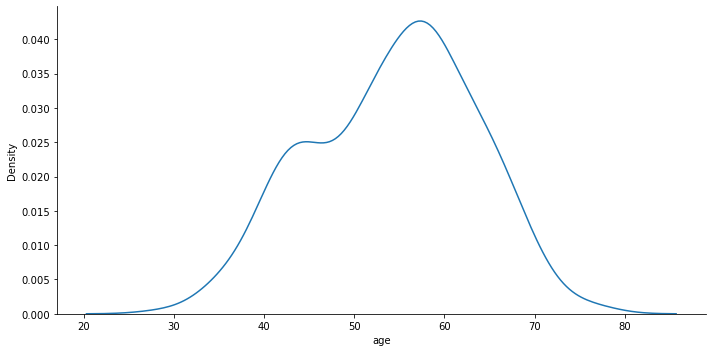

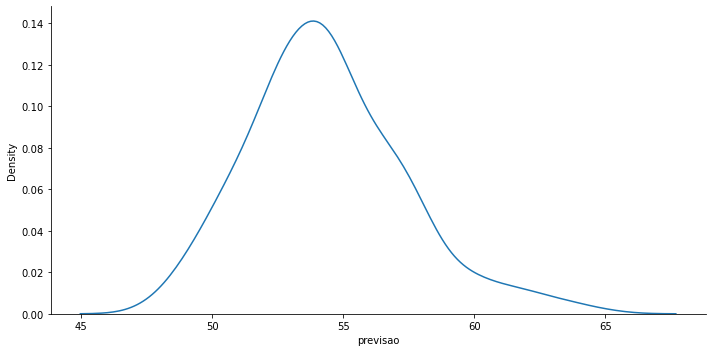

In [38]:
sns.displot(data=df, kind='kde', x='age', aspect=2);
sns.displot(data=df, kind='kde', x='previsao', aspect=2);